In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/markmacwan/Online-Shoppers-Intention-UCI-ML/master/online_shoppers_intention.csv'

df = pd.read_csv(url)

In [5]:
df.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
9962,4,184.458333,1,8.166667,44,1398.390775,0.017391,0.026403,10.573619,0.0,Nov,1,2,3,1,Returning_Visitor,True,False
3717,2,46.000000,0,0.000000,13,195.000000,0.000000,0.008333,0.000000,0.0,May,2,2,1,4,Returning_Visitor,False,False
6646,2,36.200000,0,0.000000,22,1805.083333,0.000000,0.008696,3.586636,0.0,Sep,2,2,1,2,Returning_Visitor,True,True
6517,2,88.600000,0,0.000000,59,458.610000,0.006780,0.007605,0.000000,0.0,Aug,3,2,1,4,Returning_Visitor,True,False
9894,4,68.750000,0,0.000000,137,3770.916071,0.003165,0.014745,0.000000,0.0,Dec,2,2,3,1,Returning_Visitor,False,False
11177,0,0.000000,0,0.000000,12,544.000000,0.000000,0.016667,0.000000,0.0,Nov,2,2,2,1,Returning_Visitor,False,False
2798,1,20.000000,0,0.000000,20,219.500000,0.120000,0.129762,0.000000,0.8,May,3,2,1,13,Returning_Visitor,False,False
12228,0,0.000000,0,0.000000,14,999.000000,0.000000,0.023077,8.482952,0.0,Dec,2,2,3,6,Returning_Visitor,False,True
2659,2,77.000000,0,0.000000,32,1223.416667,0.000000,0.010784,215.009412,0.0,May,3,2,4,2,Returning_Visitor,False,True
9883,5,66.400000,0,0.000000,39,742.687500,0.000000,0.015217,71.389812,0.0,Dec,2,2,4,3,Returning_Visitor,False,True


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Exploratory Data Analysis

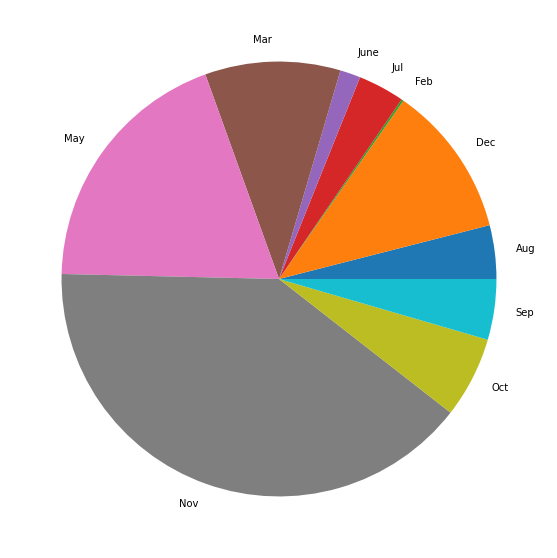

In [7]:
plt.figure(figsize=(10,10))
sums = df.Revenue.groupby(df.Month).sum()
plt.pie(sums, labels=sums.index)
plt.show()

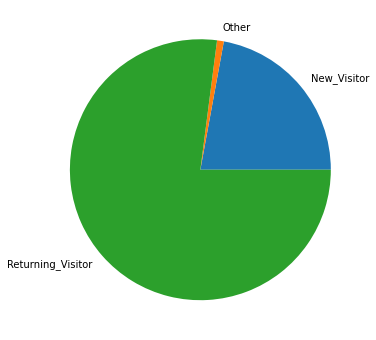

In [8]:
plt.figure(figsize=(6,6))
sums1 = df.Revenue.groupby(df.VisitorType).sum()
plt.pie(sums1, labels=sums1.index)
plt.show()

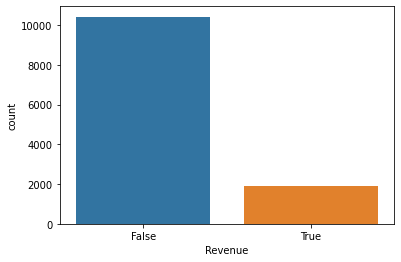

In [9]:
sns.countplot(df['Revenue'])
plt.show()

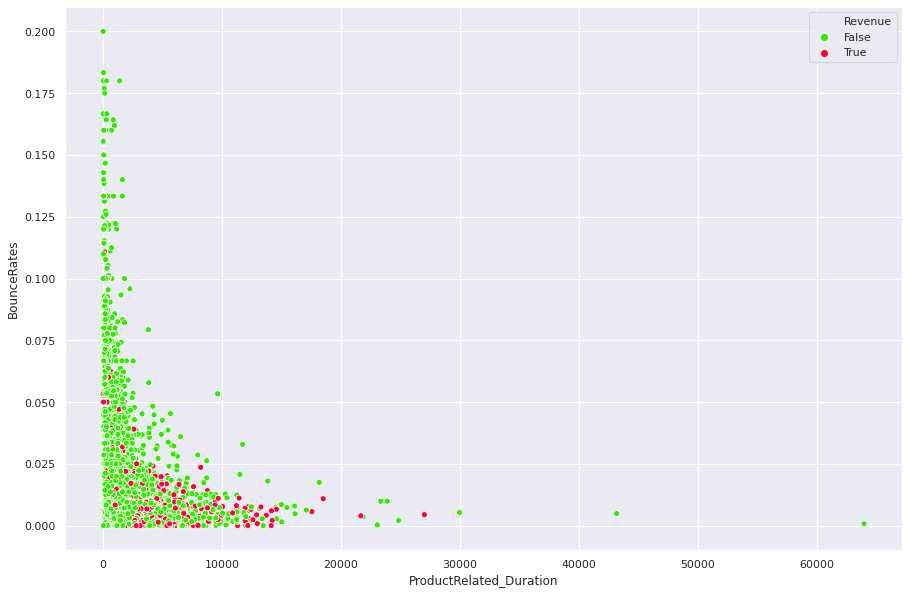

In [10]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='ProductRelated_Duration',y='BounceRates', data=df, hue='Revenue',palette='prism')
plt.show()

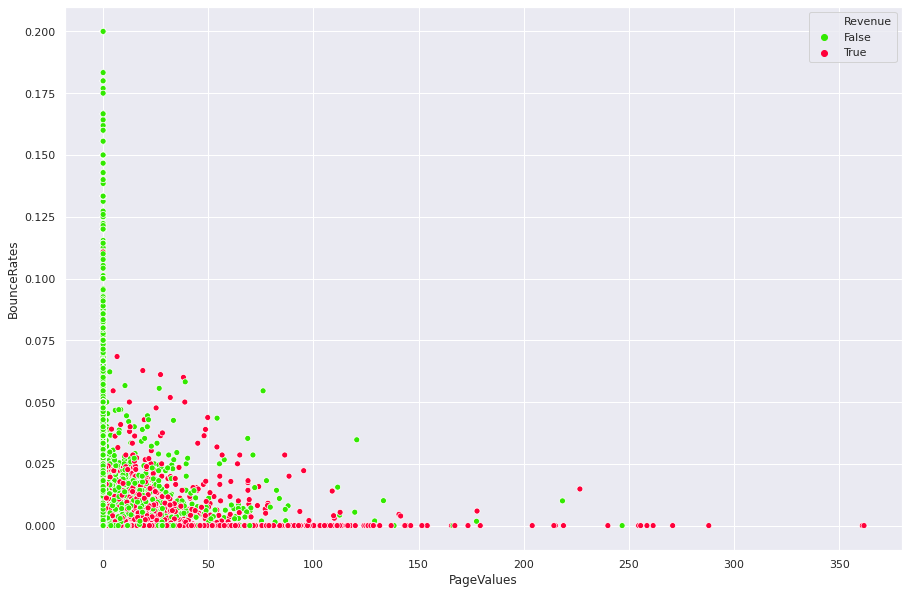

In [11]:
sns.scatterplot(x='PageValues',y='BounceRates', data=df, hue='Revenue', palette='prism')
plt.show()

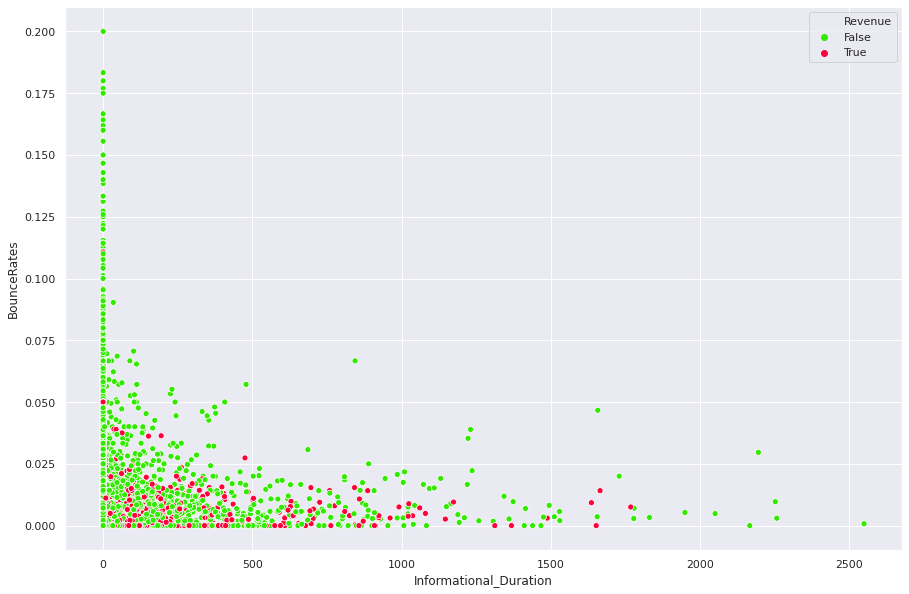

In [12]:
sns.scatterplot(x='Informational_Duration',y='BounceRates', data=df, hue='Revenue',palette='prism')
plt.show()

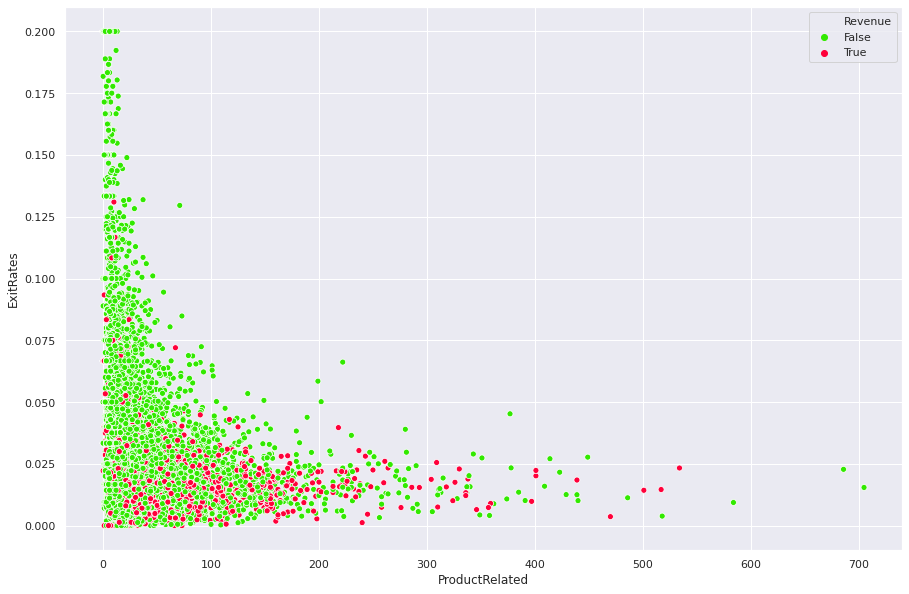

In [14]:
sns.scatterplot(x='ProductRelated',y='ExitRates', data=df, hue='Revenue',palette='prism')
plt.show()

### Preprocessing

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [0]:
df2 = df.drop(['Revenue','Month'], axis=1)

In [0]:
X = pd.get_dummies(df2,drop_first=True)

In [18]:
X.Weekend = X.Weekend.astype(int)

X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0,0,1


In [0]:
y = df['Revenue']

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=78)

### Support Vector Machine

In [0]:
from sklearn.svm import SVC

In [23]:
svc = SVC()

model = svc.fit(X_train,y_train)
y_svcpred = model.predict(X_test)

print('Accuracy of SVM:', accuracy_score(y_test, y_svcpred))


Accuracy of SVM: 0.8742903487429035


### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression()

model = lr.fit(X_train,y_train)
y_lrpred = model.predict(X_test)

print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_lrpred))

Accuracy of Logistic Regression: 0.8694241686942417


### Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier()

model = dtc.fit(X_train, y_train)
y_dtcpred = model.predict(X_test)

print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_dtcpred))

Accuracy of Decision Tree Classifier: 0.8475263584752636


### Ensemble Methods: AdaBoost Classifier, Random Forest Classifier

In [0]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [29]:
ada = AdaBoostClassifier()

model_ada = ada.fit(X_train,y_train)
y_pred_ada = model_ada.predict(X_test)

print('Accuracy of AdaBoost Classifier:', accuracy_score(y_test, y_pred_ada))


rfc = RandomForestClassifier()

model_rf = rfc.fit(X_train,y_train)
y_pred_rfc = model_rf.predict(X_test)

print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred_rfc))

Accuracy of AdaBoost Classifier: 0.8694241686942417
Accuracy of Random Forest Classifier: 0.8791565287915653


### Neural Network

In [30]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense


classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 17))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(0.20))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose=2)

y_nnpred = classifier.predict_classes(X_test)

print('Accuracy of Neural Network:', accuracy_score(y_test, y_nnpred))

Using TensorFlow backend.


Epoch 1/100
 - 1s - loss: 0.3062 - accuracy: 0.8832
Epoch 2/100
 - 1s - loss: 0.2697 - accuracy: 0.8957
Epoch 3/100
 - 1s - loss: 0.2626 - accuracy: 0.8999
Epoch 4/100
 - 1s - loss: 0.2562 - accuracy: 0.9016
Epoch 5/100
 - 1s - loss: 0.2514 - accuracy: 0.9008
Epoch 6/100
 - 1s - loss: 0.2492 - accuracy: 0.9017
Epoch 7/100
 - 1s - loss: 0.2452 - accuracy: 0.9030
Epoch 8/100
 - 1s - loss: 0.2436 - accuracy: 0.9031
Epoch 9/100
 - 1s - loss: 0.2429 - accuracy: 0.9032
Epoch 10/100
 - 1s - loss: 0.2414 - accuracy: 0.9041
Epoch 11/100
 - 1s - loss: 0.2366 - accuracy: 0.9051
Epoch 12/100
 - 1s - loss: 0.2397 - accuracy: 0.9061
Epoch 13/100
 - 1s - loss: 0.2350 - accuracy: 0.9065
Epoch 14/100
 - 1s - loss: 0.2336 - accuracy: 0.9044
Epoch 15/100
 - 1s - loss: 0.2319 - accuracy: 0.9061
Epoch 16/100
 - 1s - loss: 0.2331 - accuracy: 0.9075
Epoch 17/100
 - 1s - loss: 0.2316 - accuracy: 0.9057
Epoch 18/100
 - 1s - loss: 0.2300 - accuracy: 0.9088
Epoch 19/100
 - 1s - loss: 0.2294 - accuracy: 0.9064
Ep

In [0]:
scores = [['SVC',87.42],['LogisticRegression',86.94],['Decision Tree',84.75],['AdaBoost',86.94],['RandomForest',87.91],['NeuralNetwork',87.71]]
comparison = pd.DataFrame(scores, columns = ['Algorithm', 'Accuracy'])

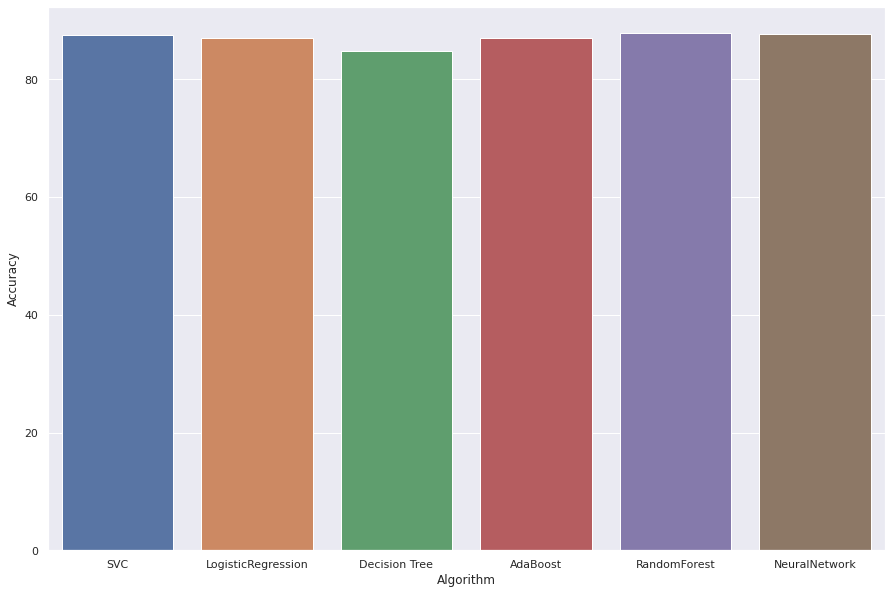

In [36]:
sns.barplot(x=comparison['Algorithm'],y=comparison['Accuracy'])
plt.show()